In [2]:

#Code to make predictions on all images to validate


import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import os

# Enter path of the CSV file
df = pd.read_csv(r'')

# enter the preprocessed image folder
folder = r''

def load_images_from_folder(folder, df):
    images = []
    labels = []
    class_folders = {
        0: 'No_DR',
        1: 'Mild',
        2: 'Moderate',
        3: 'Severe',
        4: 'Proliferate_DR'
    }
    for index, row in df.iterrows():
        diagnosis = row['diagnosis']
        class_folder = class_folders[diagnosis]
        img_path = os.path.join(folder, class_folder, row['id_code'] + '.png')
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            if img is not None:
                images.append(img)
                labels.append(diagnosis)
            else:
                print(f"Failed to load image: {img_path}")
        else:
            print(f"Image file does not exist: {img_path}")
    return images, labels

images, labels = load_images_from_folder(folder, df)

processed_images = np.array([cv2.resize(img, (224, 224)) for img in images])
processed_images = processed_images.reshape(processed_images.shape[0], 224, 224, 1)  

processed_images = processed_images / 255.0

loaded_model = tf.keras.models.load_model(r'') #enter the path in which u saved the model

print("Model loaded successfully")

predictions = loaded_model.predict(processed_images)

predicted_labels = np.argmax(predictions, axis=1)

for i, prediction in enumerate(predicted_labels):
    print(f'Image: {df.iloc[i]["id_code"]}, Predicted: {prediction}, Actual: {labels[i]}')


Model loaded successfully
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step
Image: 000c1434d8d7, Predicted: 2, Actual: 2
Image: 001639a390f0, Predicted: 4, Actual: 4
Image: 0024cdab0c1e, Predicted: 1, Actual: 1
Image: 002c21358ce6, Predicted: 0, Actual: 0
Image: 005b95c28852, Predicted: 0, Actual: 0
Image: 0083ee8054ee, Predicted: 4, Actual: 4
Image: 0097f532ac9f, Predicted: 0, Actual: 0
Image: 00a8624548a9, Predicted: 2, Actual: 2
Image: 00b74780d31d, Predicted: 2, Actual: 2
Image: 00cb6555d108, Predicted: 1, Actual: 1
Image: 00cc2b75cddd, Predicted: 0, Actual: 0
Image: 00e4ddff966a, Predicted: 2, Actual: 2
Image: 00f6c1be5a33, Predicted: 0, Actual: 0
Image: 0104b032c141, Predicted: 3, Actual: 3
Image: 0124dffecf29, Predicted: 1, Actual: 1
Image: 0125fbd2e791, Predicted: 0, Actual: 0
Image: 012a242ac6ff, Predicted: 2, Actual: 2
Image: 014508ccb9cb, Predicted: 0, Actual: 0
Image: 0151781fe50b, Predicted: 0, Actual: 0
Image: 0161338f53cc, Predicted: 2, Actual: 2
Image: 0180bfa26c0b, Predicted: 

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0
Number of images loaded: 3662
Number of labels loaded: 3662
Sample labels: [2 4 1 0 0 4 0 2 2 1]
Processed images shape: (3662, 224, 224, 1)
Model input shape: (None, 224, 224, 1)
Model loaded successfully
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step
Accuracy: 0.9683
Classification Report:
                   precision    recall  f1-score   support

           No_DR       0.99      0.98      0.99      1805
            Mild       0.97      0.96      0.97       370
        Moderate       0.96      0.95      0.96       999
          Severe       0.93      0.93      0.93       193
Proliferative_DR       0.86      0.98      0.91       295

        accuracy                           0.97      3662
       macro avg       0.94      0.96      0.95      3662
    weighted avg       0.97      0.97      0.97      3662



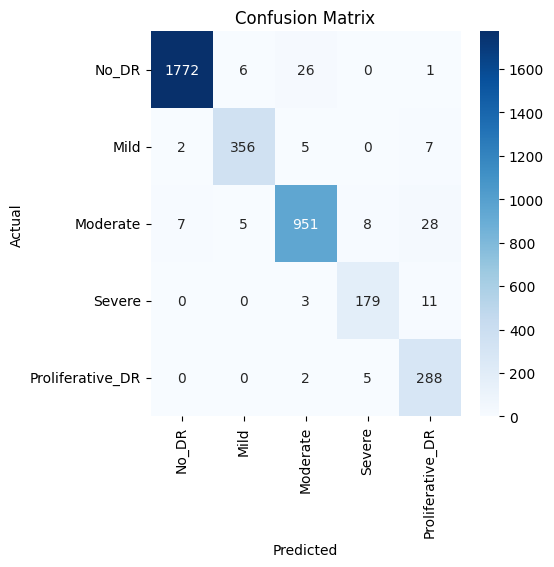

In [1]:
# code to generate report of the model

import pandas as pd
import numpy as np
import cv2
import os
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'') # enter csv file path


print(df.head())


def load_images_from_folder(folder, df):
    images = []
    labels = []
    class_folders = {
        0: 'No_DR',
        1: 'Mild',
        2: 'Moderate',
        3: 'Severe',
        4: 'Proliferate_DR'
    }
    for index, row in df.iterrows():
        diagnosis = row['diagnosis']
        class_folder = class_folders[diagnosis]
        img_path = os.path.join(folder, class_folder, row['id_code'] + '.png')
        if os.path.isfile(img_path):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            if img is not None:
                images.append(img)
                labels.append(diagnosis)
            else:
                print(f"Failed to load image: {img_path}")
        else:
            print(f"Image file does not exist: {img_path}")
    return images, labels

folder = r''  # enter the preprocessed image folder
images, labels = load_images_from_folder(folder, df)

print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No images or labels loaded. Check the directory and file paths.")

images = np.array(images)
labels = np.array(labels).astype(int)  

print("Sample labels:", labels[:10])

processed_images = np.array([cv2.resize(img, (224, 224)) for img in images])
processed_images = processed_images.reshape(processed_images.shape[0], 224, 224, 1)  

processed_images = processed_images / 255.0

print("Processed images shape:", processed_images.shape)

loaded_model = tf.keras.models.load_model(r'')  # enter the path in which u saved the model

print("Model input shape:", loaded_model.input_shape)

if loaded_model.input_shape[1:] != processed_images.shape[1:]:
    raise ValueError(f"Model expects input shape {loaded_model.input_shape[1:]}, but got {processed_images.shape[1:]}")

print("Model loaded successfully")

predictions = loaded_model.predict(processed_images)


predicted_labels = np.argmax(predictions, axis=1)

#  To Calculate accuracy
accuracy = accuracy_score(labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

#  To Generate classification report
report = classification_report(labels, predicted_labels, target_names=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR'])
print("Classification Report:\n", report)

# To Plot confusion matrix
conf_matrix = confusion_matrix(labels, predicted_labels)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR'], yticklabels=['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1]:
#To make prediction on user given image
# make sure to apply guassian filter on the image if guassian filter is not applied


import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

model_path = r''  # enter the path in which u saved the model
loaded_model = tf.keras.models.load_model(model_path)

print("Model loaded successfully")

def preprocess_image(image_path):
   
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or failed to load.")
  
    img_resized = cv2.resize(img, (224, 224))
 
    img_normalized = img_resized / 255.0
   
    img_reshaped = np.reshape(img_normalized, (1, 224, 224, 1))
    return img_reshaped

def predict_image(model, image_path):
    img_processed = preprocess_image(image_path)
    prediction = model.predict(img_processed)
    predicted_label = np.argmax(prediction, axis=1)[0]
    class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative_DR']
    predicted_class = class_names[predicted_label]
    return predicted_class

user_input_image_path = r'' # Enter the path of image that u want to predict

try:
    predicted_class = predict_image(loaded_model, user_input_image_path)
    print(f"Predicted class for the input image: {predicted_class}")
except ValueError as e:
    print(e)


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
Predicted class for the input image: Moderate
